In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [85]:
#Creating a sample dataset
np.random.seed(42)
sample_data = np.random.normal(loc=50,scale=10,size=100) # Normal Distribution with (loc - MEAN, scale - STD)
outliers = np.array([200,115,2,10])
sample_data = np.concatenate([sample_data, outliers])

In [86]:
sample_df = pd.DataFrame(sample_data,columns=["Values"])
sample_df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


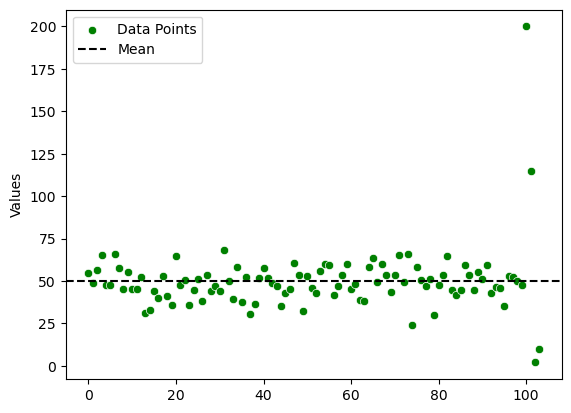

In [87]:
sns.scatterplot(sample_df["Values"],color="green",label="Data Points")
plt.axhline(y=sample_df.values.mean(),ls="--",color="black",label="Mean")
plt.legend()
plt.show()

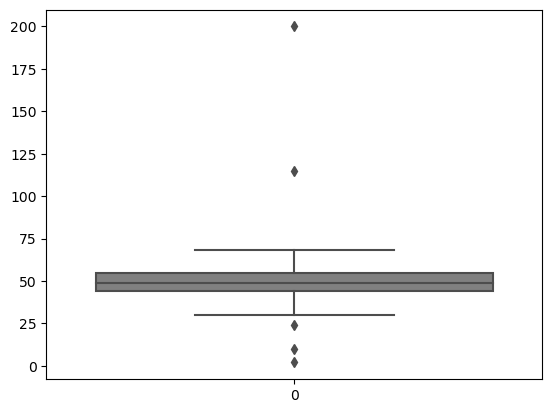

In [88]:
sns.boxplot(sample_df["Values"],color="grey")
plt.show()

## Z-Score Method

   - Formula: Z = (x - μ) / σ
   - IF mod(Z) > 3, they are Outliers

In [89]:
temp = sample_df.copy()
mean, std = temp["Values"].mean(), temp["Values"].std()
temp["z-score"] = (temp["Values"] - mean )/std 

#sample_df["z-score"] = zscore(sample_df["Values"])    --{from scipy.stats import zscore}

temp["is_outlier"] = temp["z-score"].apply(lambda x: True if abs(x)>3 else False)
temp[temp["is_outlier"]==True]

,Values,z-score,is_outlier
100,200.0,7.707389,True
101,115.0,3.333377,True


## IQR(Inter Quartile Range) Method
   - Q1 = First 25 percentile, Q3 = (First 75 percentile)
   - IQR = Q3 - Q1 (middle 50 percentile)
   - Lower Bound = **Q1 - 1.5 * IQR**, Upper Bound = **Q3 + 1.5 * IQR** 
   - If a value is out of this boundaries, mark it as outlier

In [90]:
temp = sample_df.copy()
Q1 = temp["Values"].quantile(0.25)
Q3 = temp["Values"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

temp["is_outlier"] = temp["Values"].apply(lambda x: x>upper_bound or x<lower_bound)
temp[temp["is_outlier"]==True]

,Values,is_outlier
74,23.802549,True
100,200.000000,True
101,115.000000,True
102,2.000000,True
103,10.000000,True


## Finding Outliers Using the IQR Method with a 5-Number Summary**

   **The 5-number summary consists of:**

   - Minimum (Q0) → The smallest value in the dataset.
   - First Quartile (Q1) → The 25th percentile (lower quartile).
   - Median (Q2) → The 50th percentile (middle value).
   - Third Quartile (Q3) → The 75th percentile (upper quartile).
   - Maximum (Q4) → The largest value in the dataset.
   
   **The Interquartile Range (IQR) is calculated as:**
   - IQR=Q3−Q1 
   - Any value outside the range:
   - [Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [92]:
temp = sample_df.copy()

min_value = np.max(temp["Values"])
Q1 = np.percentile(temp["Values"],25)
Q2 = np.percentile(temp["Values"],50)
Q3 = np.percentile(temp["Values"],75)
max_value = np.max(temp["Values"])

IQR = Q3 - Q1

lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

outliers = temp[(temp["Values"]>upper_bound)|(temp["Values"]<lower_bound)]
print(f"{min_value} - {Q1} - {Q2} - {Q3} -{max_value}")
outliers

200.0-43.874401021766715-48.73043708220287-55.00852473036764-200.0


,Values
74,23.802549
100,200.000000
101,115.000000
102,2.000000
103,10.000000
